# Max Verstappen
<img src="https://www.formula1.com/content/fom-website/en/drivers/max-verstappen/_jcr_content/image.img.1920.medium.jpg/1646819045507.jpg" width="300">

### Team: Red Bull Racing

<img src ="https://www.formula1.com/content/fom-website/en/drivers/max-verstappen/_jcr_content/helmet.img.png/1646824946942.png" width="200">


In [1]:
library (tidyverse)
library (tidymodels)
source("source/master_functions.r")
source("source/regression.r")
source("source/prediction.r")
set.seed(620)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

Warning message:
“package ‘tidyr’ was built under R version 4.1.2”
Warning message:
“package ‘readr’ was built under R version 4.1.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Registered S3 method overwritten by 'tune':
  method                   from   
  required_pkgs.model_spec parsnip

── Attaching packages ────────────────────────────────────── tidymodels 0.1.3 ──

✔ broom        0.7.12     ✔ rsample      0.1.1 
✔ dials        0.1.0      ✔ tune         0.1.6 
✔ infer        1.0.0      ✔ workflows    0.2.4 
✔ modeldata    0.1.1      ✔ workflowsets 0.1.0 
✔ parsnip      0.1.7      ✔ yardstick    0.0.9 
✔ recipes      0.1.17     

Warning message

In [2]:
initialize_master()

Rows: 79 Columns: 9

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (6): circuitRef, name, location, country, alt, url
dbl (3): circuitId, lat, lng


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 12716 Columns: 7

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): positionText
dbl (6): constructorStandingsId, raceId, constructorId, points, position, wins


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 11950 Columns: 5

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): status
dbl (4): constructorResultsId, raceId, constructorId, points


ℹ Use `spec()` to retrieve the full column specification for this

In [3]:
# Filtering Lap Data For 2022 Drivers

lap_data <- lap_times %>%
            filter(driverId %in% driver_ids) %>%
            filter(raceId %in% race_ids)

ver_laps <- lap_data %>%
            filter(driverId == 830)

# Season Analysis

In [4]:
rmse_col <- data.frame(.metric = character(), .estimator = character(), .estimate = double(), Round = double(), stringsAsFactors=FALSE) 

racetime_col <- data.frame(race_time_milliseconds = double(), race_time_mins = double(), race_time_hrs = double()) 

rmse_col

racetime_col

.metric,.estimator,.estimate,Round
<chr>,<chr>,<dbl>,<dbl>


race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>


raceId,n
<dbl>,<int>
949,57
1011,57
1045,57
1052,56


`geom_smooth()` using formula 'y ~ x'



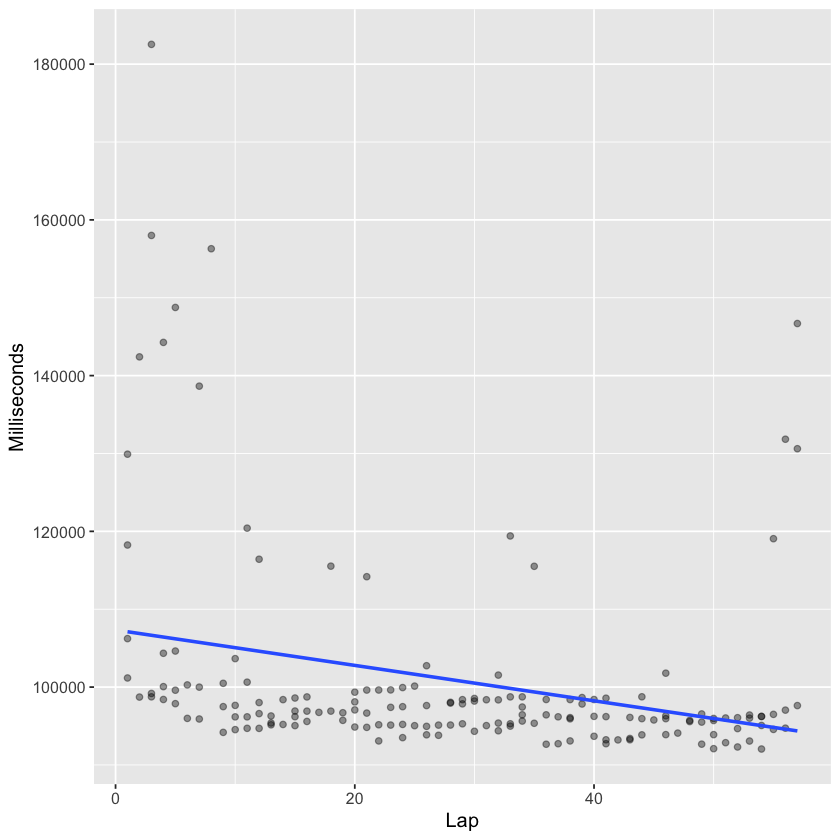

In [5]:
set.seed(2022)

#1. Bahrain 

mv_bahrain <- ver_laps %>%
                filter(raceId %in% bahrain_race_ID) 

mv_bahrain_clean <- mv_bahrain %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) %>% 
                        head(4)
mv_bahrain_clean
mv_bahrain_clean_ID <- mv_bahrain_clean %>%
                        pull(raceId)


 ### SPLITTING DATA

mv_bahrain_races <- ver_laps %>%
                    filter(raceId %in% mv_bahrain_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(mv_bahrain_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION AND EVALUATION

initiate_linear_regression()

round_n <- 1

initiate_rmse() 

### GETS PREDICTION

get_bahrain_prediction()

raceId,n
<dbl>,<int>
1042,66
1054,66


`geom_smooth()` using formula 'y ~ x'



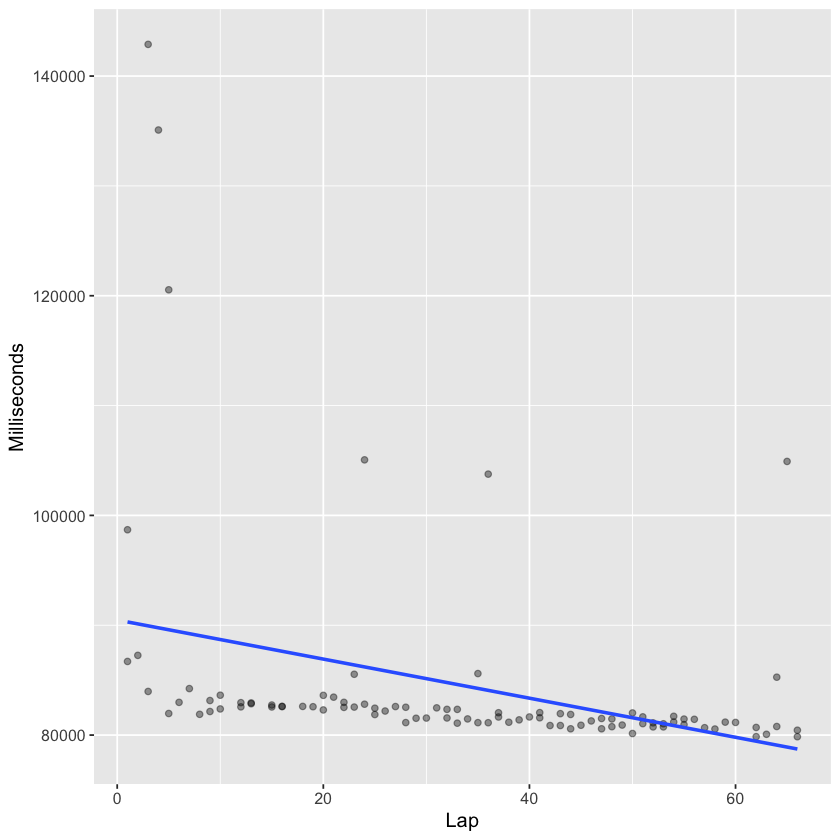

In [6]:
set.seed(2022)

#2. Portimão

mv_Portimão <- ver_laps %>%
                filter(raceId %in% Portimão_race_ID) 

mv_Portimão_clean <- mv_Portimão %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
mv_Portimão_clean
mv_Portimão_clean_ID <- mv_Portimão_clean %>%
                        pull(raceId)


### SPLITTING DATA

mv_Portimão_races <- ver_laps %>%
                    filter(raceId %in% mv_Portimão_clean_ID) 

formulaone_split <- initial_split(mv_Portimão_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION AND EVALUATION

initiate_linear_regression()

round_n <- 2

initiate_rmse() 

### GETS PREDICTION

get_Portimão_prediction()

raceId,n
<dbl>,<int>
989,58
1010,58
948,57
969,57


`geom_smooth()` using formula 'y ~ x'



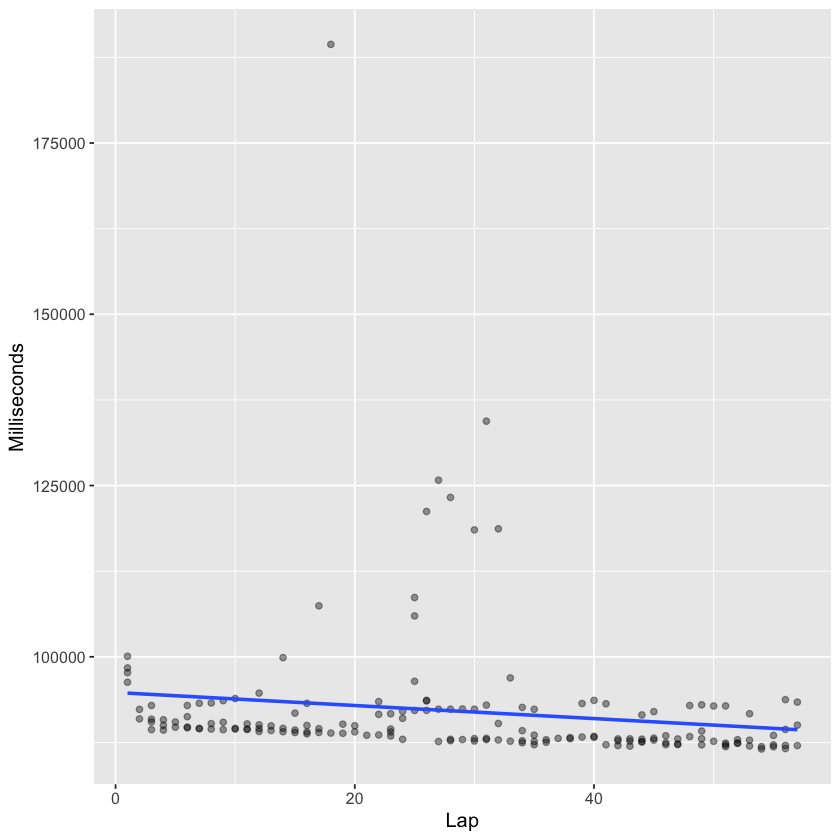

In [7]:
set.seed(2022)

#3. Austrailia 

mv_aus <- ver_laps %>%
                filter(raceId %in% aus_race_ID) 

mv_aus_clean <- mv_aus %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) %>%
                        head(4)
mv_aus_clean
mv_aus_clean_ID <- mv_aus_clean %>%
                        pull(raceId)

mv_aus_races <- ver_laps %>%
                    filter(raceId %in% mv_aus_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(mv_aus_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION AND EVALUATION

initiate_linear_regression()

round_n <- 3

initiate_rmse() 

### GETS PREDICTION

get_australia_prediction()

raceId,n
<dbl>,<int>
1053,63


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20.
* Stratification will use 3 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



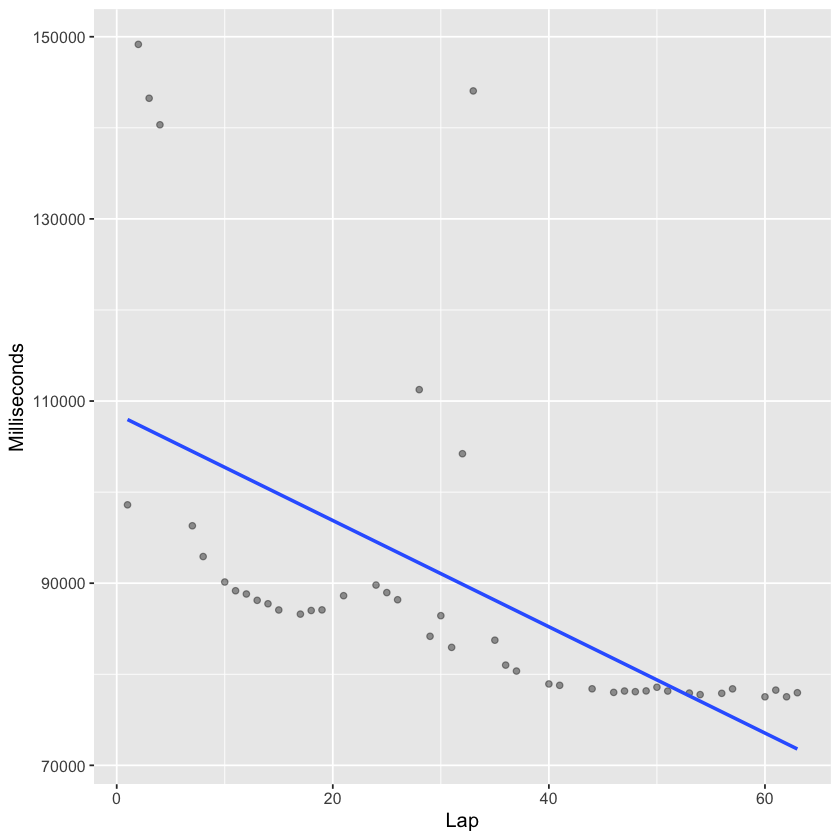

In [8]:
set.seed(2022)

#4. Imola, Italy 

mv_imola <- ver_laps %>%
                filter(raceId %in% imola_race_ID) 

mv_imola_clean <- mv_imola %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) %>%
                        head(1)
mv_imola_clean
mv_imola_clean_ID <- mv_imola_clean %>%
                        pull(raceId)

mv_imola_races <- ver_laps %>%
                    filter(raceId %in% mv_imola_clean_ID)

formulaone_split <- initial_split(mv_imola_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION AND EVALUATION

initiate_linear_regression()

round_n <- 4

initiate_rmse() 

### GETS PREDICTION

get_imola_prediction()

raceId,n
<dbl>,<int>
1044,58


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20.
* Stratification will use 2 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



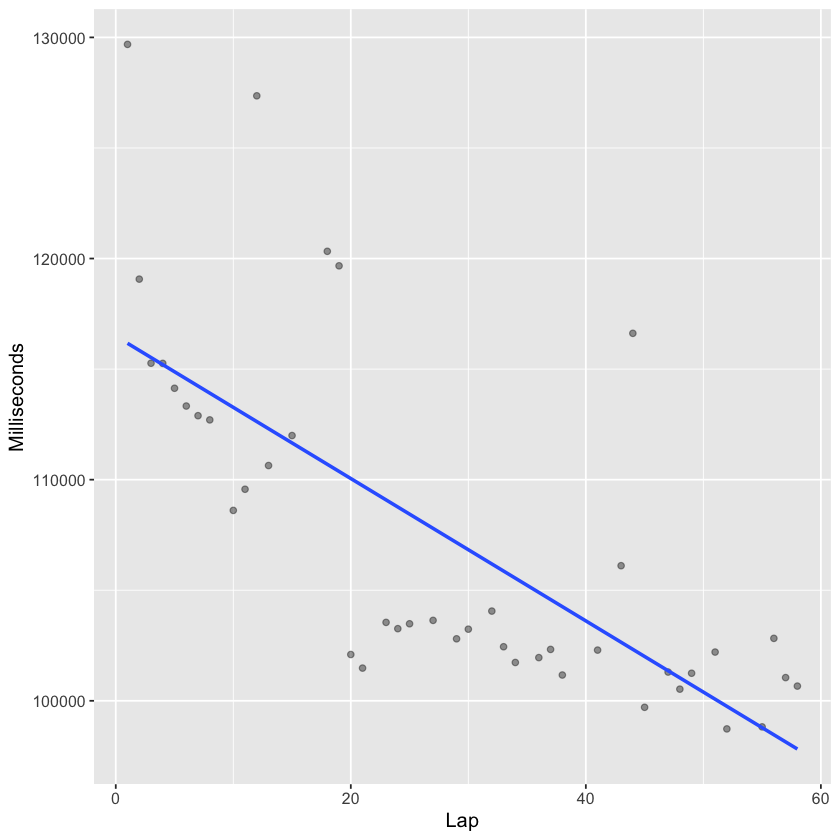

In [9]:
set.seed(2022)

#5. Turkey (Replacing Miami)

mv_turkey <- ver_laps %>%
                filter(raceId %in% turkey_race_ID) 

mv_turkey_clean <- mv_turkey %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) %>%
                        head(1)
mv_turkey_clean
mv_turkey_clean_ID <- mv_turkey_clean %>%
                        pull(raceId)

mv_turkey_races <- ver_laps %>%
                    filter(raceId %in% mv_turkey_clean_ID)

formulaone_split <- initial_split(mv_turkey_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION AND EVALUATION

initiate_linear_regression()

round_n <- 5

initiate_rmse() 

### GETS PREDICTION

get_miami_prediction()

raceId,n
<dbl>,<int>
952,66
993,66
1014,66
1036,66
1055,66
930,65


`geom_smooth()` using formula 'y ~ x'



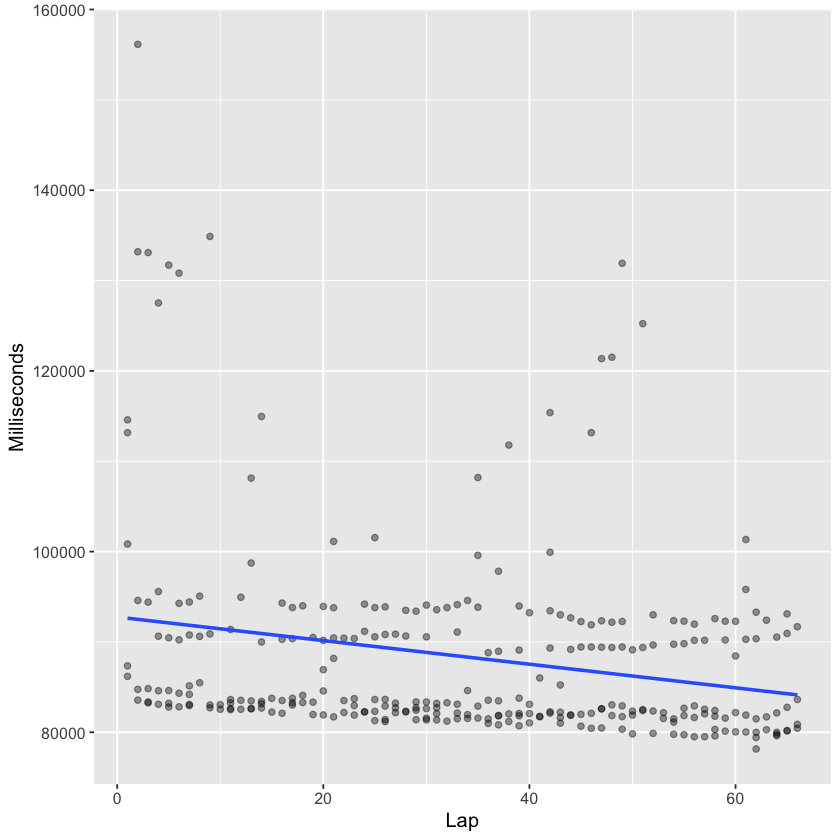

In [10]:
set.seed(2022)

#6. Spain 

mv_spain <- ver_laps %>%
                filter(raceId %in% spain_race_ID) 

mv_spain_clean <- mv_spain %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) %>%
                        head(6)
mv_spain_clean
mv_spain_clean_ID <- mv_spain_clean %>%
                        pull(raceId) 

mv_spain_races <- ver_laps %>%
                    filter(raceId %in% mv_spain_clean_ID)

formulaone_split <- initial_split(mv_spain_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION AND EVALUATION

initiate_linear_regression()

round_n <- 6

initiate_rmse() 

### GETS PREDICTION

get_spain_prediction()

raceId,n
<dbl>,<int>
974,78
994,78
1015,78
1056,78


`geom_smooth()` using formula 'y ~ x'



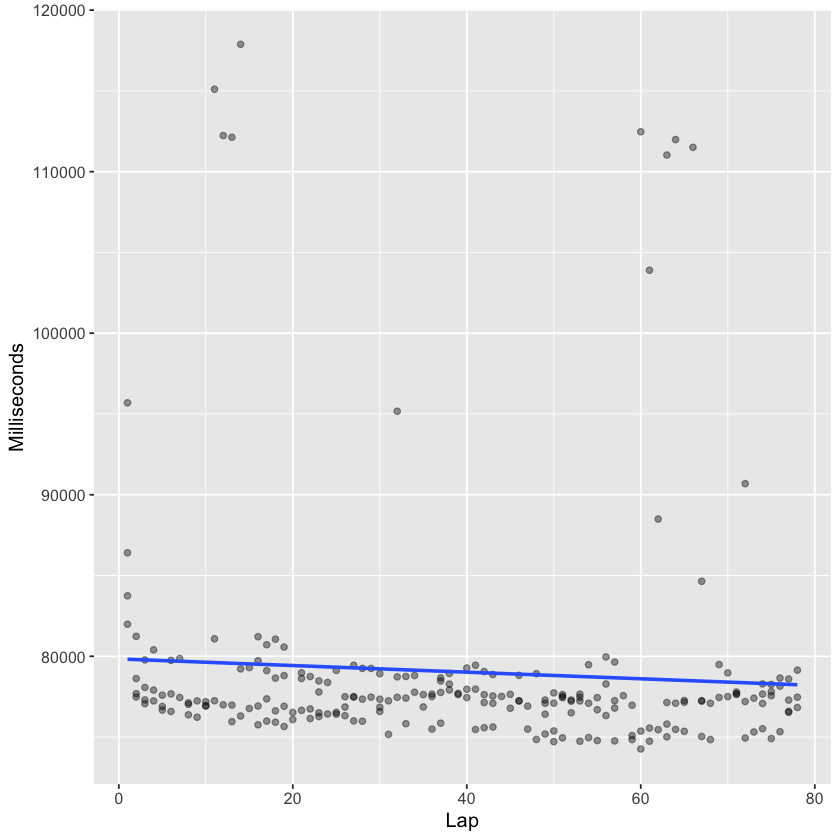

In [11]:
set.seed(2022)

#7. Monaco 

mv_monaco <- ver_laps %>%
                filter(raceId %in% monaco_race_ID) 

mv_monaco_clean <- mv_monaco %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) %>%  
                        head(4)
mv_monaco_clean
mv_monaco_clean_ID <- mv_monaco_clean %>%
                        pull(raceId)

mv_monaco_races <- ver_laps %>%
                    filter(raceId %in% mv_monaco_clean_ID)

formulaone_split <- initial_split(mv_monaco_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION AND EVALUATION

initiate_linear_regression()

round_n <- 7

initiate_rmse() 

### GETS PREDICTION

get_monaco_prediction()

raceId,n
<dbl>,<int>
955,51
1013,51


`geom_smooth()` using formula 'y ~ x'



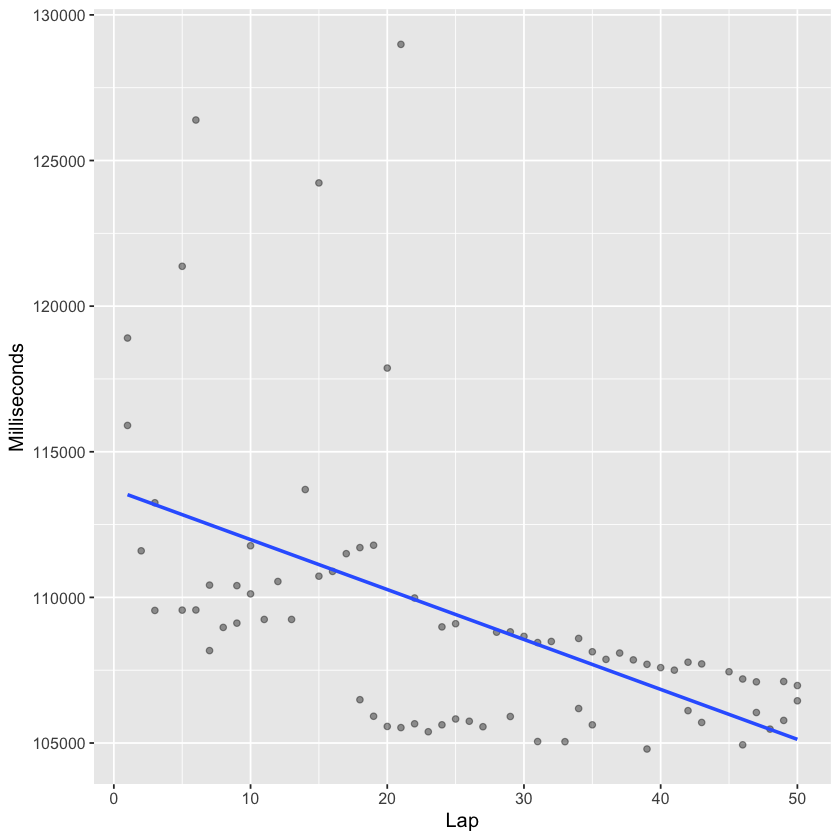

In [12]:
set.seed(2022)

#8. Azerbaijan 

mv_azerbaijan <- ver_laps %>%
                filter(raceId %in% azerbaijan_race_ID) 

mv_azerbaijan_clean <- mv_azerbaijan %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) %>%
                        head(2)
mv_azerbaijan_clean
mv_azerbaijan_clean_ID <- mv_azerbaijan_clean %>%
                        pull(raceId)

mv_azerbaijan_races <- ver_laps %>%
                    filter(raceId %in% mv_azerbaijan_clean_ID)

formulaone_split <- initial_split(mv_azerbaijan_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION AND EVALUATION

initiate_linear_regression()

round_n <- 8

initiate_rmse() 

### GETS PREDICTION

get_azerbaijan_prediction()

raceId,n
<dbl>,<int>
954,70
1016,70
932,69
995,68


`geom_smooth()` using formula 'y ~ x'



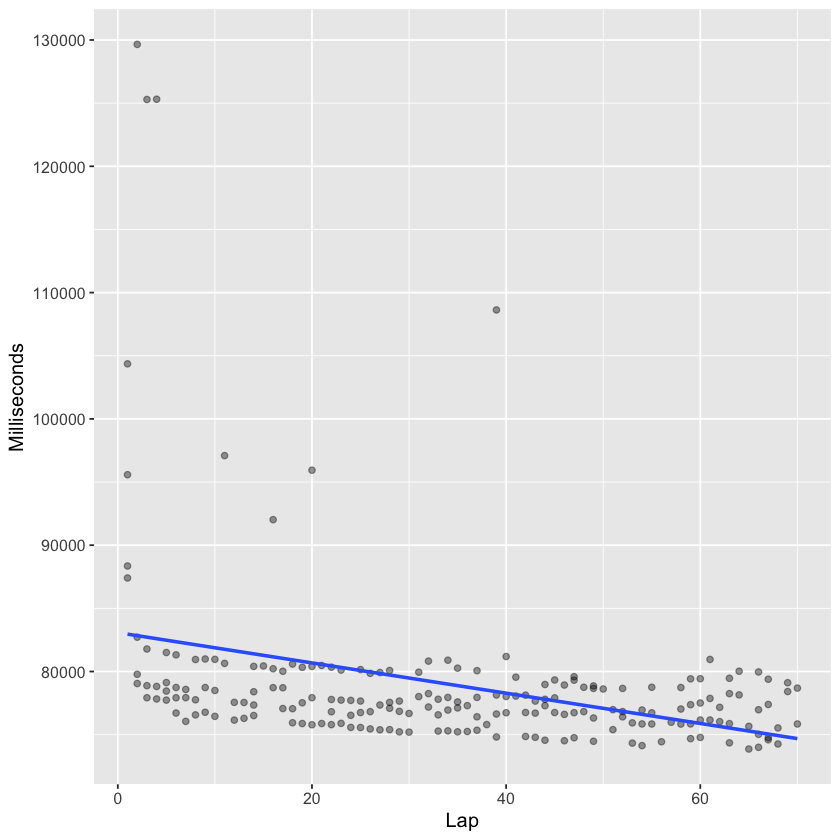

In [13]:
set.seed(2022)

#9. Canada 

mv_canada <- ver_laps %>%
                filter(raceId %in% canada_race_ID) 

mv_canada_clean <- mv_canada %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) %>%
                        head(4)
mv_canada_clean
mv_canada_clean_ID <- mv_canada_clean %>%
                        pull(raceId)

mv_canada_races <- ver_laps %>%
                    filter(raceId %in% mv_canada_clean_ID)

formulaone_split <- initial_split(mv_canada_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION AND EVALUATION

initiate_linear_regression()

round_n <- 9

initiate_rmse() 

### GETS PREDICTION

get_canada_prediction()

raceId,n
<dbl>,<int>
957,52
1019,52
1034,52
1035,52
978,51


`geom_smooth()` using formula 'y ~ x'



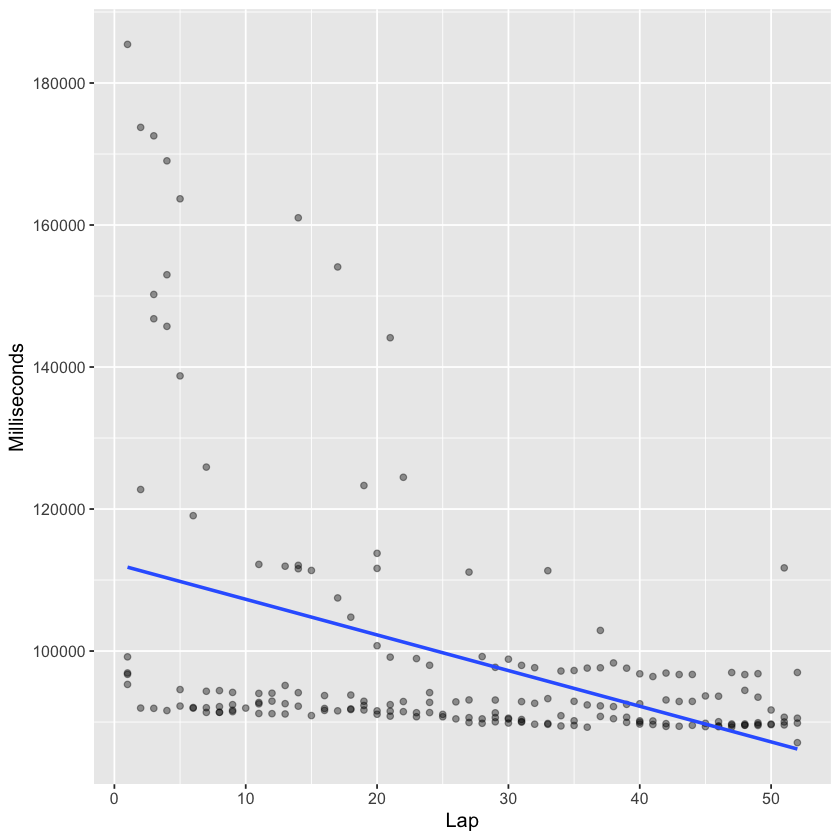

In [14]:
set.seed(2022)

#10. Great Britain 

mv_uk <- ver_laps %>%
                filter(raceId %in% uk_race_ID) 

mv_uk_clean <- mv_uk %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) %>%
                        head(5)
mv_uk_clean
mv_uk_clean_ID <- mv_uk_clean %>%
                        pull(raceId)

mv_uk_races <- ver_laps %>%
                    filter(raceId %in% mv_uk_clean_ID)

formulaone_split <- initial_split(mv_uk_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION AND EVALUATION

initiate_linear_regression()

round_n <- 10

initiate_rmse() 

### GETS PREDICTION

get_uk_prediction()

raceId,n
<dbl>,<int>
956,71
997,71
1018,71
1032,71
1058,71
1060,71
933,70


`geom_smooth()` using formula 'y ~ x'



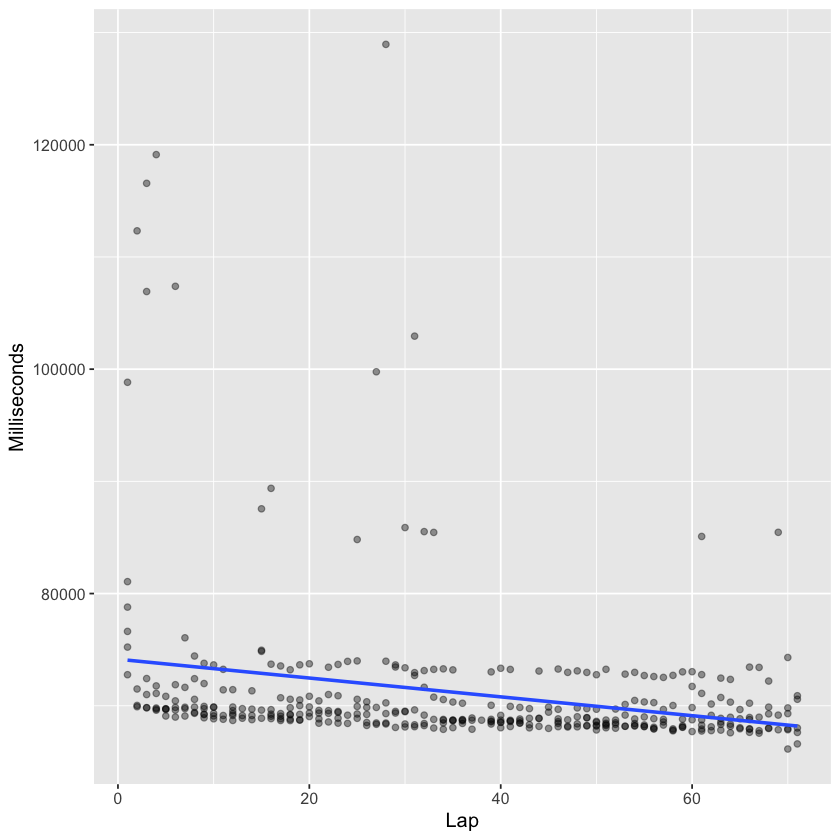

In [15]:
set.seed(2022)

#11. Austria 

mv_austria <- ver_laps %>%
                filter(raceId %in% austria_race_ID) 

mv_austria_clean <- mv_austria %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) %>%
                        head(7)
mv_austria_clean
mv_austria_clean_ID <- mv_austria_clean %>%
                        pull(raceId)

mv_austria_races <- ver_laps %>%
                    filter(raceId %in% mv_austria_clean_ID)

formulaone_split <- initial_split(mv_austria_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION AND EVALUATION

initiate_linear_regression()

round_n <- 11

initiate_rmse() 

### GETS PREDICTION

get_austria_prediction()

raceId,n
<dbl>,<int>
996,53
1017,53
1059,53


`geom_smooth()` using formula 'y ~ x'



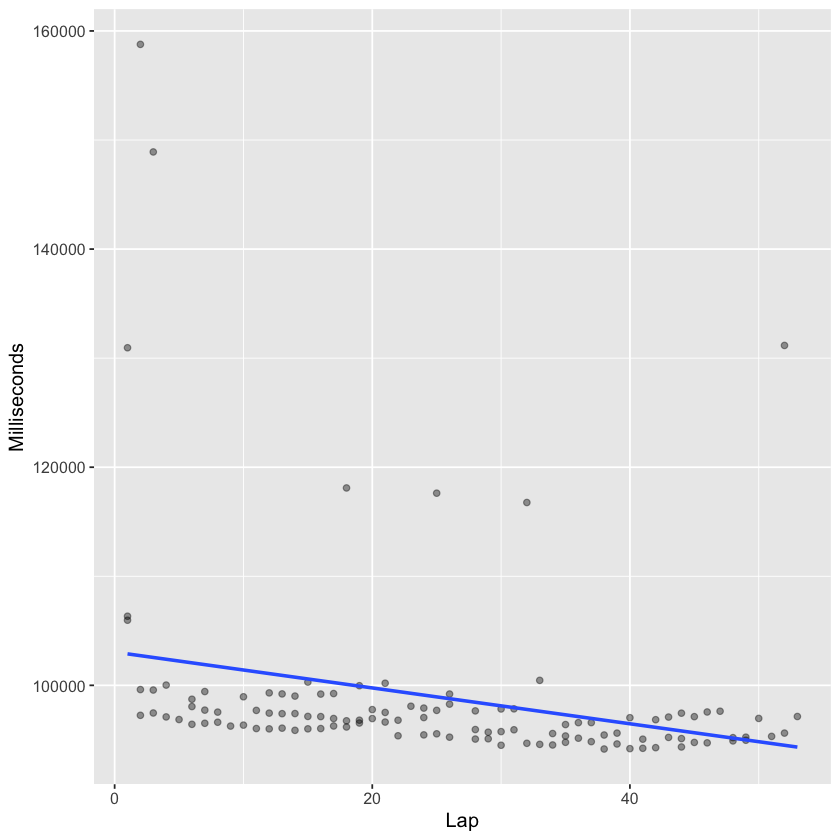

In [16]:
set.seed(2022)

#12. France 

mv_france <- ver_laps %>%
                filter(raceId %in% france_race_ID) 

mv_france_clean <- mv_france %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
mv_france_clean
mv_france_clean_ID <- mv_france_clean %>%
                        pull(raceId)

mv_france_races <- ver_laps %>%
                    filter(raceId %in% mv_france_clean_ID)

formulaone_split <- initial_split(mv_france_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION AND EVALUATION

initiate_linear_regression()

round_n <- 12

initiate_rmse() 

### GETS PREDICTION

get_france_prediction()

raceId,n
<dbl>,<int>
958,70
979,70
1021,70
1033,70
1062,70
936,69


`geom_smooth()` using formula 'y ~ x'



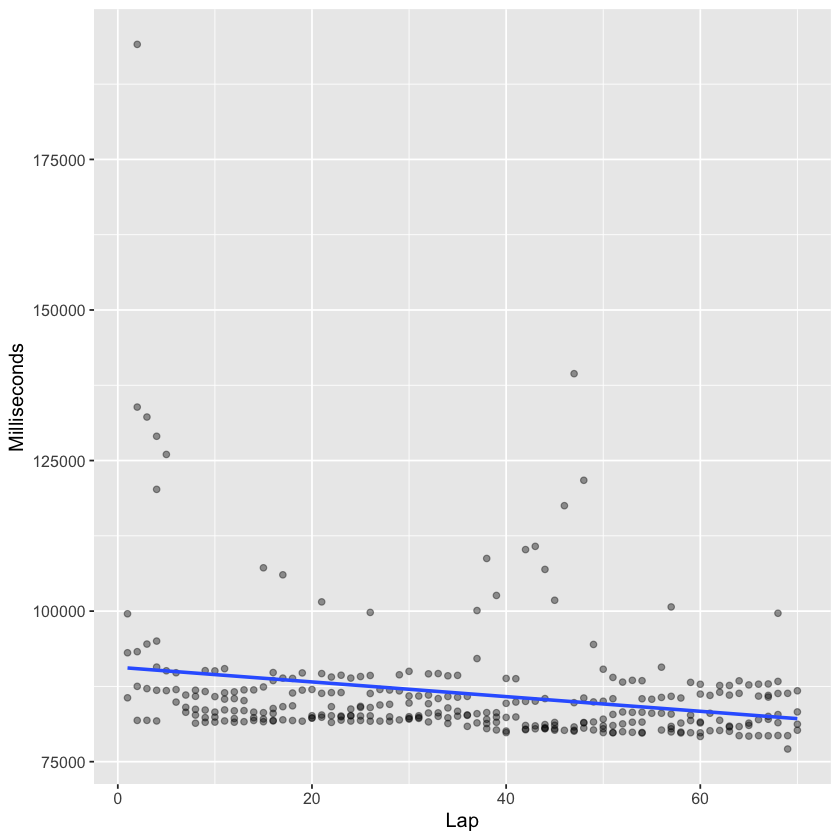

In [17]:
set.seed(2022)

#13. Hungary 

mv_hungary <- ver_laps %>%
                filter(raceId %in% hungary_race_ID) 

mv_hungary_clean <- mv_hungary %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) %>%
                        head(6)
mv_hungary_clean
mv_hungary_clean_ID <- mv_hungary_clean %>%
                        pull(raceId)

mv_hungary_races <- ver_laps %>%
                    filter(raceId %in% mv_hungary_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(mv_hungary_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION AND EVALUATION

initiate_linear_regression()

round_n <- 13

initiate_rmse() 

### GETS PREDICTION

get_hungary_prediction()

raceId,n
<dbl>,<int>
960,44
1001,44
1037,44
937,43


`geom_smooth()` using formula 'y ~ x'



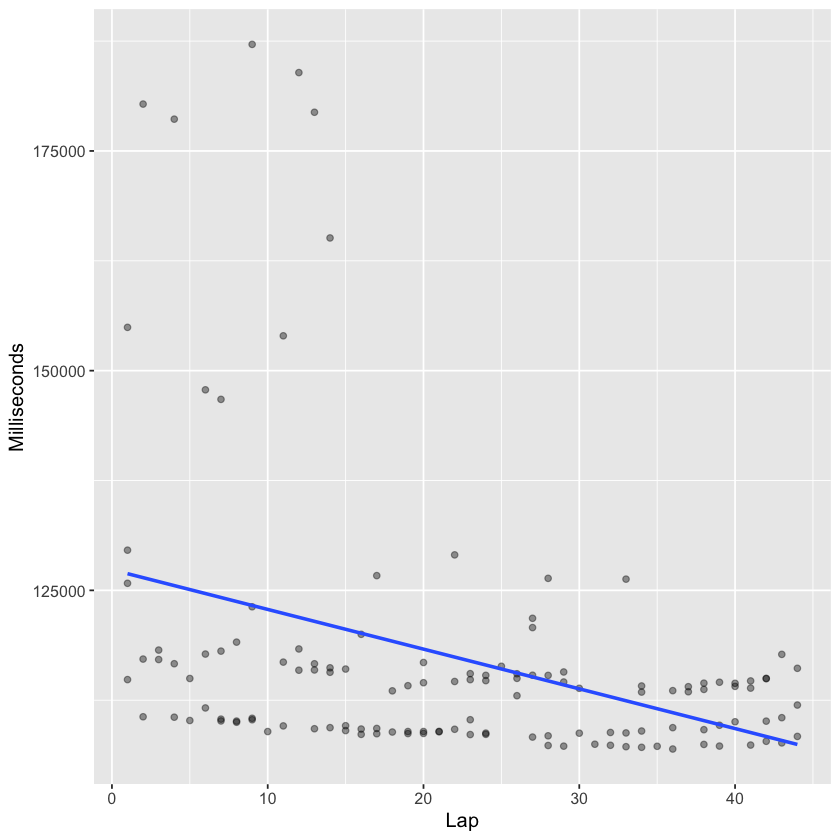

In [18]:
set.seed(2022)

#14. Belgium 

mv_belgium <- ver_laps %>%
                filter(raceId %in% belgium_race_ID) 

mv_belgium_clean <- mv_belgium %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) %>%
                        head(4)
mv_belgium_clean
mv_belgium_clean_ID <- mv_belgium_clean %>%
                        pull(raceId)

mv_belgium_races <- ver_laps %>%
                    filter(raceId %in% mv_belgium_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(mv_belgium_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION AND EVALUATION

initiate_linear_regression()

round_n <- 14

initiate_rmse() 

### GETS PREDICTION

get_belgium_prediction()

raceId,n
<dbl>,<int>
1064,72


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20.
* Stratification will use 3 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



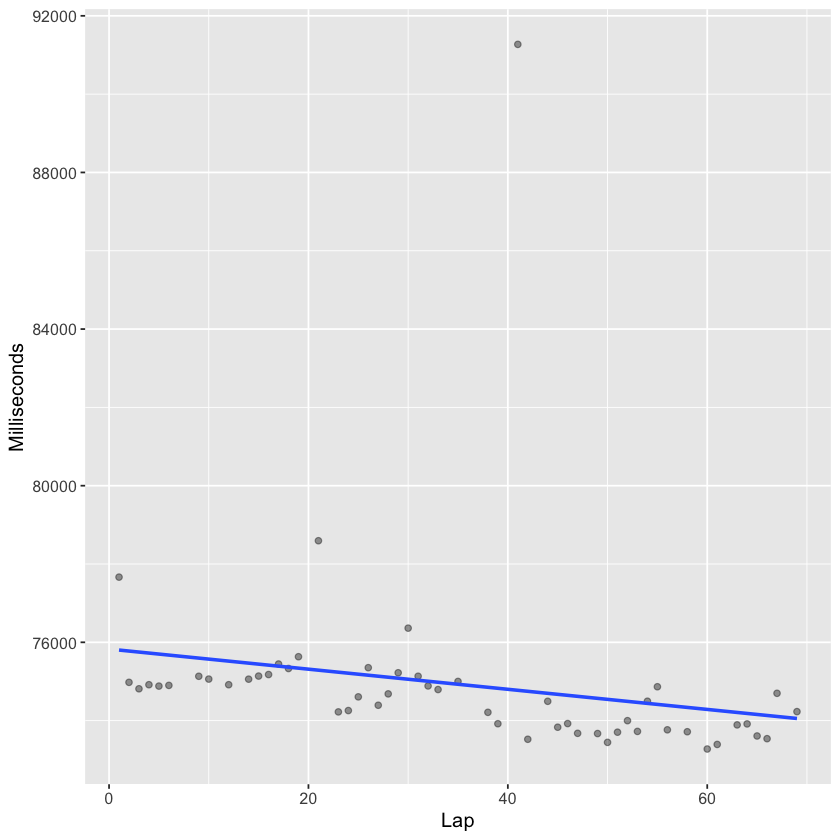

In [19]:
set.seed(2022)

#15. Netherlands 

mv_netherlands <- ver_laps %>%
                filter(raceId %in% netherlands_race_ID) 

mv_netherlands_clean <- mv_netherlands %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
mv_netherlands_clean
mv_netherlands_clean_ID <- mv_netherlands_clean %>%
                        pull(raceId)

mv_netherlands_races <- ver_laps %>%
                    filter(raceId %in% mv_netherlands_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(mv_netherlands_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION AND EVALUATION

initiate_linear_regression()

round_n <- 15

initiate_rmse() 

### GETS PREDICTION

get_netherlands_prediction()

raceId,n
<dbl>,<int>
961,53
1002,53
1023,53
938,52
981,52


`geom_smooth()` using formula 'y ~ x'



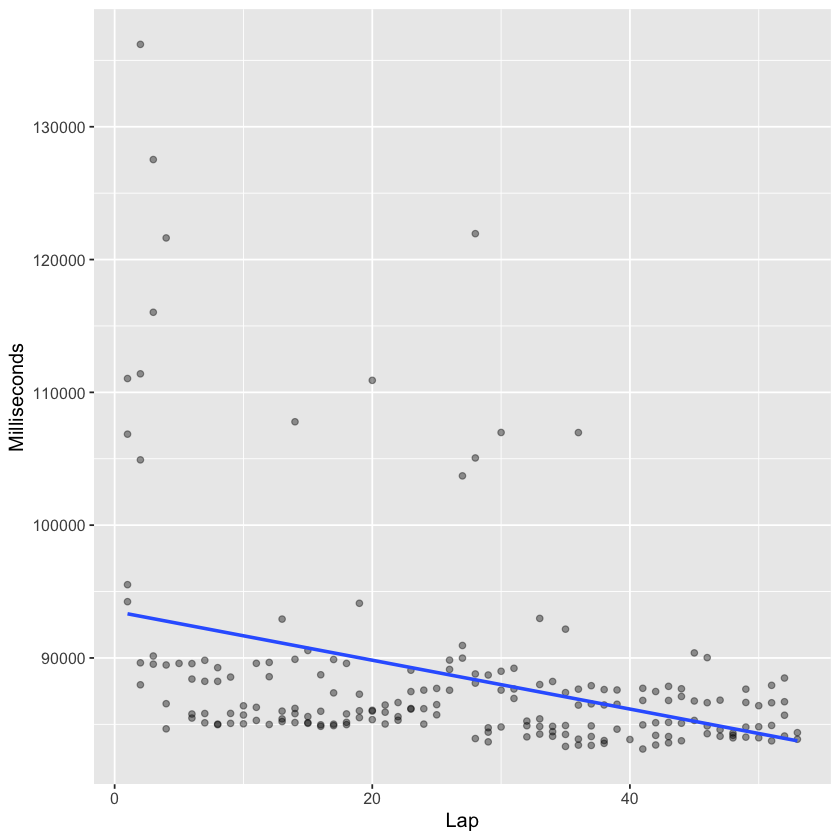

In [20]:
set.seed(2022)

#16. Monza, Italy 

mv_monza <- ver_laps %>%
                filter(raceId %in% monza_race_ID) 

mv_monza_clean <- mv_monza %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) %>%
                        head(5)
mv_monza_clean
mv_monza_clean_ID <- mv_monza_clean %>%
                        pull(raceId)

mv_monza_races <- ver_laps %>%
                    filter(raceId %in% mv_monza_clean_ID)

formulaone_split <- initial_split(mv_monza_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION AND EVALUATION

initiate_linear_regression()

round_n <- 16

initiate_rmse() 

### GETS PREDICTION

get_monza_prediction()

raceId,n
<dbl>,<int>
939,61
962,61
1003,61
1024,61


`geom_smooth()` using formula 'y ~ x'



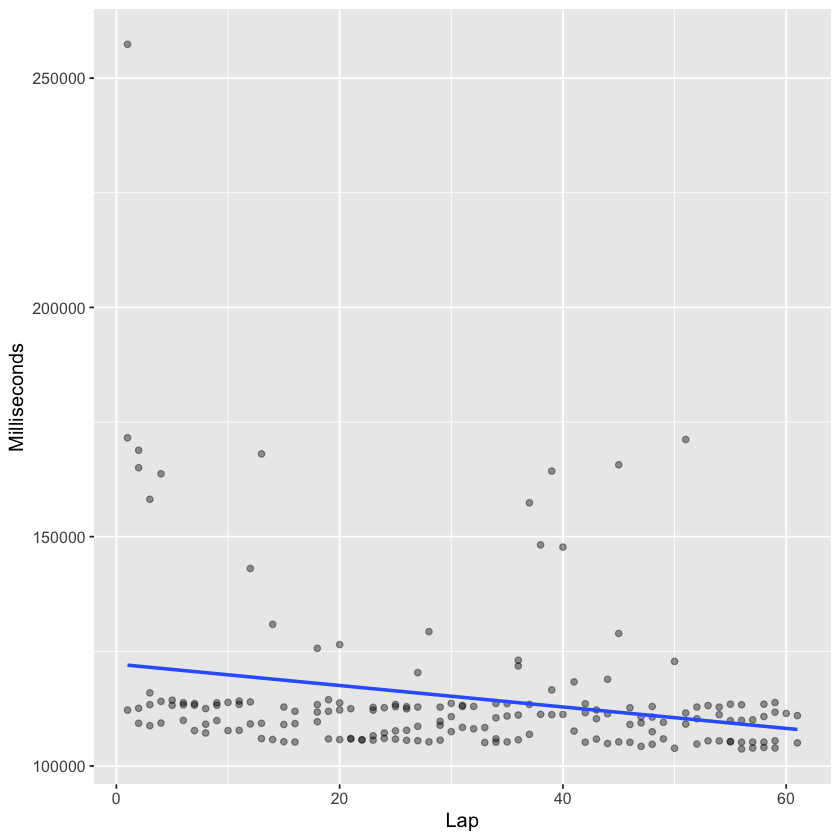

In [21]:
set.seed(2022)

#17. Singapore 

mv_singapore <- ver_laps %>%
                filter(raceId %in% singapore_race_ID) 

mv_singapore_clean <- mv_singapore %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
mv_singapore_clean
mv_singapore_clean_ID <- mv_singapore_clean %>%
                        pull(raceId)

mv_singapore_races <- ver_laps %>%
                    filter(raceId %in% mv_singapore_clean_ID) 

formulaone_split <- initial_split(mv_singapore_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION AND EVALUATION

initiate_linear_regression()

round_n <- 17

initiate_rmse() 

### GETS PREDICTION

get_singapore_prediction()

raceId,n
<dbl>,<int>
940,53
964,53
984,53
1005,53


`geom_smooth()` using formula 'y ~ x'



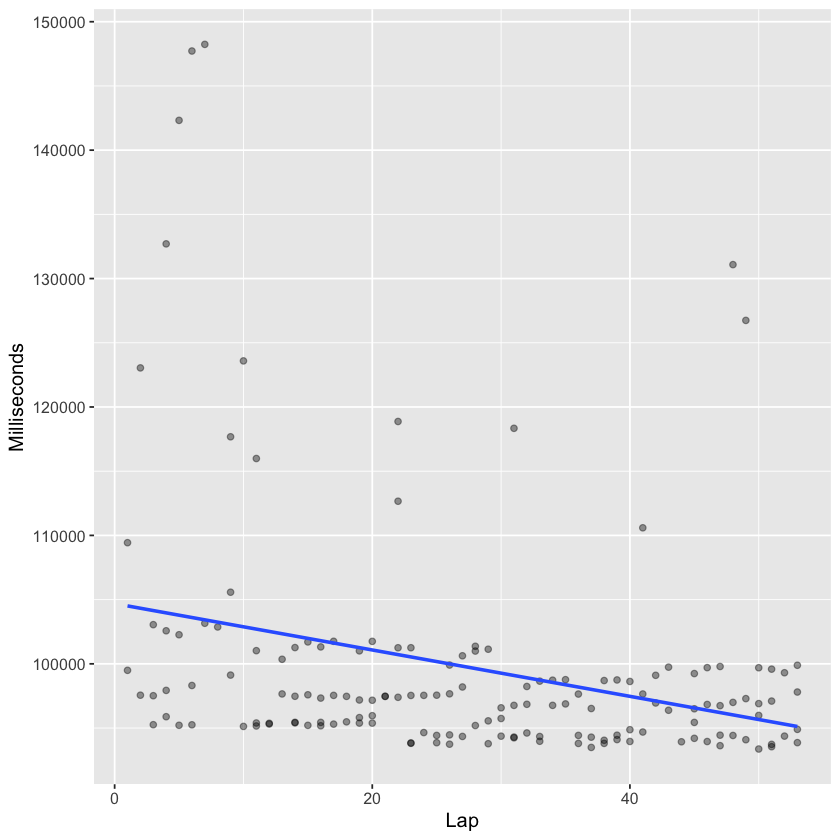

In [22]:
set.seed(2022)

#18. Japan 

mv_japan <- ver_laps %>%
                filter(raceId %in% japan_race_ID) 

mv_japan_clean <- mv_japan %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) %>%
                        head(4)
mv_japan_clean
mv_japan_clean_ID <- mv_japan_clean %>%
                        pull(raceId)

mv_japan_races <- ver_laps %>%
                    filter(raceId %in% mv_japan_clean_ID)

formulaone_split <- initial_split(mv_japan_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION AND EVALUATION

initiate_linear_regression()

round_n <- 18

initiate_rmse() 

### GETS PREDICTION

get_japan_prediction()

raceId,n
<dbl>,<int>
942,56
985,56
1006,56
1028,56
1069,56


`geom_smooth()` using formula 'y ~ x'



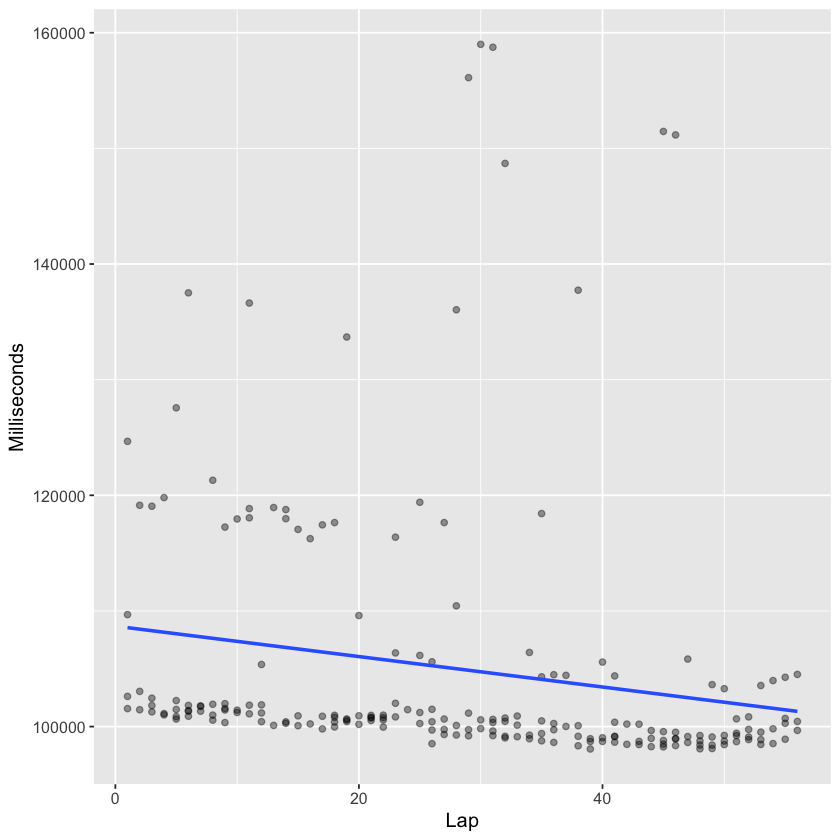

In [23]:
set.seed(2022)

#19. Austin, USA

mv_austin <- ver_laps %>%
                filter(raceId %in% austin_race_ID) 

mv_austin_clean <- mv_austin %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n))  %>%
                        head(5)
mv_austin_clean
mv_austin_clean_ID <- mv_austin_clean %>%
                        pull(raceId)

mv_austin_races <- ver_laps %>%
                    filter(raceId %in% mv_austin_clean_ID)

formulaone_split <- initial_split(mv_austin_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION AND EVALUATION

initiate_linear_regression()

round_n <- 19

initiate_rmse() 

### GETS PREDICTION

get_austin_prediction()

raceId,n
<dbl>,<int>
943,71
966,71
986,71
1007,71
1027,71
1070,71


`geom_smooth()` using formula 'y ~ x'



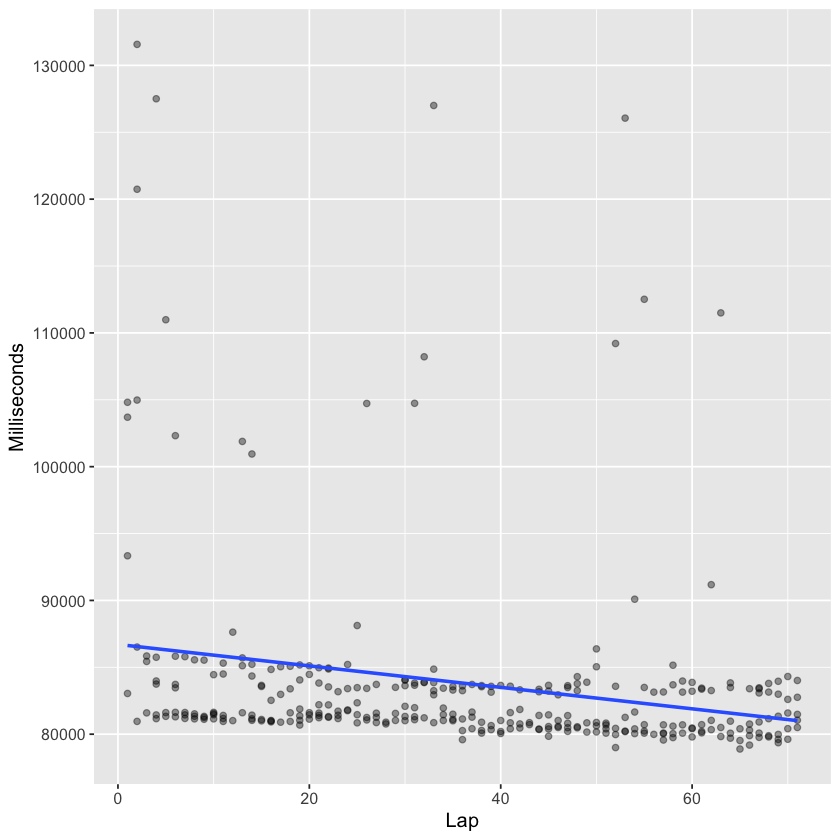

In [24]:
set.seed(2022)

#20. Mexico 

mv_mexico <- ver_laps %>%
                filter(raceId %in% mexico_race_ID) 

mv_mexico_clean <- mv_mexico %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
mv_mexico_clean
mv_mexico_clean_ID <- mv_mexico_clean %>%
                        pull(raceId)

mv_mexico_races <- ver_laps %>%
                    filter(raceId %in% mv_mexico_clean_ID)

formulaone_split <- initial_split(mv_mexico_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION AND EVALUATION

initiate_linear_regression()

round_n <- 20

initiate_rmse() 

### GETS PREDICTION

get_mexico_prediction()

raceId,n
<dbl>,<int>
967,71
987,71
1008,71
1029,71
1071,71
944,70


`geom_smooth()` using formula 'y ~ x'



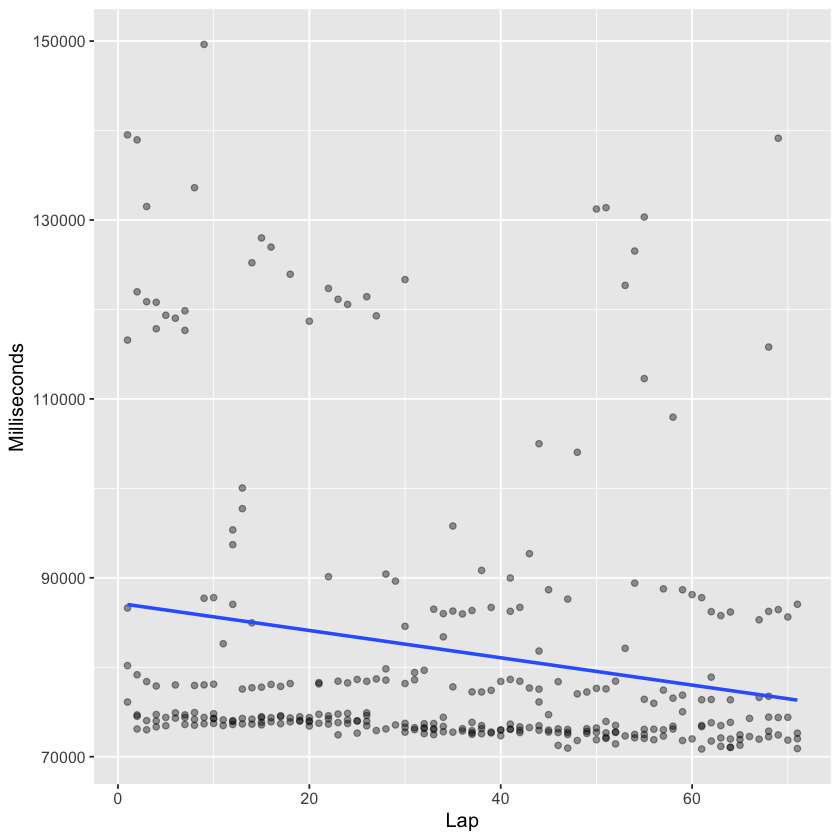

In [25]:
set.seed(2022)

#21. Brazil 

mv_brazil <- ver_laps %>%
                filter(raceId %in% brazil_race_ID) 

mv_brazil_clean <- mv_brazil %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
mv_brazil_clean
mv_brazil_clean_ID <- mv_brazil_clean %>%
                        pull(raceId)

mv_brazil_races <- ver_laps %>%
                    filter(raceId %in% mv_brazil_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(3:1000)

formulaone_split <- initial_split(mv_brazil_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION AND EVALUATION

initiate_linear_regression()

round_n <- 21

initiate_rmse() 

### GETS PREDICTION

get_brazil_prediction()

raceId,n
<dbl>,<int>
968,55
988,55
1009,55
1030,55
1047,55


`geom_smooth()` using formula 'y ~ x'



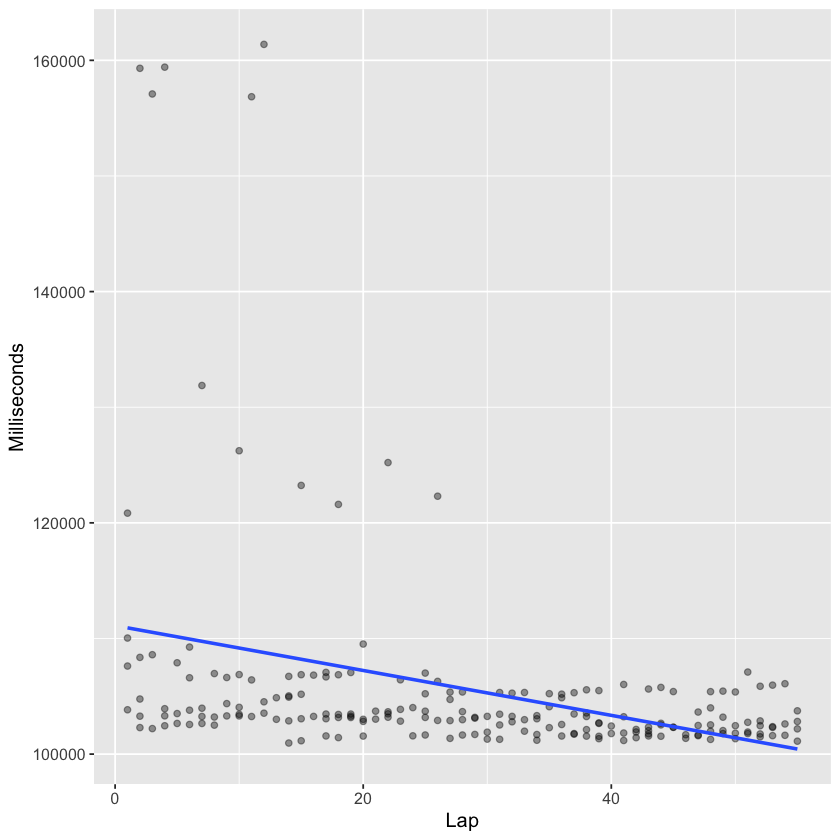

In [26]:
set.seed(2022)

#22. Abu Dhabi 

mv_uae <- ver_laps %>%
                filter(raceId %in% uae_race_ID) 

mv_uae_clean <- mv_uae %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) %>%
                        filter(n == 55)
mv_uae_clean
mv_uae_clean_ID <- mv_uae_clean %>%
                        pull(raceId)

mv_uae_races <- ver_laps %>%
                    filter(raceId %in% mv_uae_clean_ID)

formulaone_split <- initial_split(mv_uae_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION AND EVALUATION

initiate_linear_regression()

round_n <- 22

initiate_rmse() 

### GETS PREDICTION

get_uae_prediction()

## Collection

In [27]:
rmse_col
racetime_col

mv_merge <- merge(rmse_col, racetime_col)

mv_merge

write_csv(mv_merge, "final_race_data/mv_race.csv")

.metric,.estimator,.estimate,Round
<chr>,<chr>,<dbl>,<dbl>
rmse,standard,10650.5590,1
rmse,standard,7924.1102,2
rmse,standard,4968.2657,3
rmse,standard,397177.4858,4
rmse,standard,4961.0133,5
rmse,standard,11052.7798,6
rmse,standard,6552.2961,7
rmse,standard,8352.4173,8
rmse,standard,3579.9786,9


race_time_milliseconds,race_time_mins,race_time_hrs,Round
<dbl>,<dbl>,<dbl>,<dbl>
5742130,95.70216,1.595036,1
5578044,92.96740,1.549457,2
5335088,88.91813,1.481969,3
5662555,94.37591,1.572932,4
6107796,101.79660,1.696610,5
5833439,97.22398,1.620400,6
6164141,102.73569,1.712261,7
5571281,92.85469,1.547578,8
5517676,91.96127,1.532688,9


Round,.metric,.estimator,.estimate,race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,rmse,standard,10650.5590,5742130,95.70216,1.595036
2,rmse,standard,7924.1102,5578044,92.96740,1.549457
3,rmse,standard,4968.2657,5335088,88.91813,1.481969
4,rmse,standard,397177.4858,5662555,94.37591,1.572932
5,rmse,standard,4961.0133,6107796,101.79660,1.696610
6,rmse,standard,11052.7798,5833439,97.22398,1.620400
7,rmse,standard,6552.2961,6164141,102.73569,1.712261
8,rmse,standard,8352.4173,5571281,92.85469,1.547578
9,rmse,standard,3579.9786,5517676,91.96127,1.532688
